### Dataset cleaning and modelling:

- For the cleaning of the text and summary the following steps were followed:
  - Removing the duplicate reviews.[Nearly 120k such reviews were detected and removed]
  - Consider the reviews with only 1,2,4 and 5 scores.
  - Expand contractions. [Eg: you're turns to you are ]
  - Remove the **stopwords** from the sentences which is obtained from the nltk corpus
  - Remove unnecessary symbols and punctuations from the text data
  - Remove **HTML tags**. Use the beautifulsoup API for achieving this
  - Use **porter stemming** algorithm from the nltk library to remove the stems from words to 'try' converting them to their root words

- The preprocessing functions here achieves the above mentioned goal of cleaning the dataset
- Group together corresponding 'Text' and 'Summary' dataset so as to have a single matrix representing the feature matrix
- From the *sklearn* library import ***countvectorizer***.This is a ***BOW***(Bag of words) featurizer that converts each of the sentence into a single ***n dimensional*** list.This list basically consists of the count of each of the word in that sentence.It will be zero if a word doesn't exist which is quite often.The feature size typically is *20000* to *80000*. 
- The dataset is now ready for modelling

In [16]:
import pandas as pd
text = pd.read_csv('Reviews.csv')
text.fillna('')

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [17]:
print "Columns of the dataset:",text.columns
print "The number of datapoints in the dataset",text.shape
#10 columns with 9 of them being useful

Index([u'Id', u'ProductId', u'UserId', u'ProfileName', u'HelpfulnessNumerator',
       u'HelpfulnessDenominator', u'Score', u'Time', u'Summary', u'Text'],
      dtype='object')
(568454, 10)


### The below dictionary consists of the contractions that need to be expanded in the sentences

In [18]:
new_text = text.drop_duplicates(["Summary", "Text"],keep='first')
print "Previous dataset",text.shape
print "New dataset",new_text.shape

contractions_dict = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he shall",
"he'll've": "he shall have",
"he's": "he has",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"i'd": "I had",
"i'd've": "I would have",
"i'll": "I will",
"i'll've": "I will have",
"i'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there had",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they had",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you shall have",
"you're": "you are",
"you've": "you have"}

Previous dataset (568454, 10)
New dataset (394970, 10)


## 1. Preprocessing

In [22]:
def preprocessing(dataset,column):
    from bs4 import BeautifulSoup
    text = pd.read_csv(dataset)
    text = text.sort_values(by=['Time'], ascending= True)
    text.fillna('')
    print "Number of reviews",text.shape
    
    print "Removing duplicates"
    text = text.drop_duplicates(["Summary", "Text"],keep='first')
    iter_text = text.values
    #for i in range(0,10):
    #    print iter_text[i][column]
    #10 columns with 9 of them being useful
    #All to lower case
    from nltk import word_tokenize
    from nltk.corpus import stopwords
    #nltk.download()
    stop = set(stopwords.words('english'))
    words = []

    summary = []
    #expand contractions like you've to you have
    import re
    contractions_re = re.compile('(%s)' % '|'.join(contractions_dict.keys()))
    def expand_contractions(sentence, contractions_dict=contractions_dict):
        def replace(match):
            return contractions_dict[match.group(0)]
        return contractions_re.sub(replace, sentence)

    print "Removing stop words and expanding contractions..."
    for i in range(0,len(iter_text)):
        if type(iter_text[i][column]) == type('') and iter_text[i][6] != 3:
            iter_text[i][column] = iter_text[i][column].lower()
            sentence = expand_contractions(iter_text[i][column])
            #Remove non-letters
            sentence = re.sub("[^a-zA-Z]"," ", sentence)
            buffer_sentence = [i for i in sentence.split() if i not in stop]
            word = ''
            for j in buffer_sentence:
                if len(j) >= 2:
                    word +=' '+j
            summary.append(word)
        elif iter_text[i][6] != 3:
            summary.append('NA')
    
    from nltk.stem import PorterStemmer
    porter = PorterStemmer()
    
    
    print "Removing Punctuations..."
    pattern = re.compile('\W')
    for i in range(0,len(summary)):
        if type(summary[i]) == type(''):
            summary[i] = re.sub(pattern, ' ', summary[i])
        
    
    
    print "Removing HTML tags and performing stemming..."
    for i in range(0,len(summary)):
        if type(summary[i]) == type(''):
            summary[i] = porter.stem(summary[i])
            example1 = BeautifulSoup(summary[i]) 
            summary[i] = example1.get_text()
            
            
    
    return summary
#End of function


In [43]:
#Extract the scores for each reviews leaving out the score!=3 
text = pd.read_csv('Reviews.csv')
text = text.sort_values(by=['Time'], ascending= True)
text = text.drop_duplicates(["Summary", "Text"],keep='first')
text.fillna('')
iter_text = text.values
scores = []
for i in range(0,len(iter_text)):
    if iter_text[i][6] != 3:
        scores.append(iter_text[i][6])
    
    

In [45]:
print len(summary)

365130


In [24]:
summary = preprocessing('Reviews.csv',8)
reviews = preprocessing('Reviews.csv',9)

Number of reviews (568454, 10)
Removing duplicates
Removing stop words and expanding contractions...
Removing Punctuations...
Removing HTML tags and performing stemming...


/home/arunghontale/anaconda2/lib/python2.7/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 174 of the file /home/arunghontale/anaconda2/lib/python2.7/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


Number of reviews (568454, 10)
Removing duplicates
Removing stop words and expanding contractions...
Removing Punctuations...
Removing HTML tags and performing stemming...


In [25]:
dataset = []
for i in range(0,len(summary)):
    dataset.append(summary[i]+' '+reviews[i])

### 2. Usage of countvectorizer as well as counter function to get the most important features

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(max_features = 200000)
data = vec.fit_transform(dataset)
vocab = vec.get_feature_names()

In [ ]:
#The below code is done to find the important features
data_list = []
sentence = 0
for i in range(0,len(dataset)):
    sentence = dataset[i].split()
    for j in range(0,len(sentence)):
        data_list.append(sentence[j])
    sentence = 0

from collections import Counter
counts = Counter(data_list)

counts = dict(counts)

from collections import OrderedDict
sorted_counts = OrderedDict(sorted(counts.items(), key=lambda x: x[1]))

sort_counts_rev = sorted_counts.items()
counts_value = []
for i in range(len(sort_counts_rev)-1,0,-1):
    counts_value.append(sort_counts_rev[i][1])
    
print "Top 100 features",counts_value[0:99]

In [81]:
##Convert 1,2 to 0[negative] and 4,5 to 1[positive]
for i in range(0,len(scores)):
    if scores[i] > 3:
        scores[i] = 1
    else:
        scores[i] = 0

In [29]:
for i in range(0,len(score)):
    score[i] = sum(score[i])

### Modelling:
- We will try three models here and use gridsearch for parameter tuning:
  - Multinomial Naive bayes with optimal alpha(laplace smoothing) value.
  - Logistic regression with optimal *regularization coefficient*[alpha] and optimal regularizer [l1,l2,elasticnet]
  - SVM with linear kernel with optimal *regularization coefficient*[alpha] and optimal regularizer [l1,l2,elasticnet]
  - SVM rbf with optimal ***alpha*** and ***C*** value 
 
- Find the below for each of the models:
  - Recall, Accuracy and precision
  - AUC along with ROC curve
  - Log loss
  - Confusion matrix

In [179]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier


best_params = []
parameters = {'alpha':[i for i in range(1,100,10)]}
features = [i for i in range(10000,130000,10000)]
for i in range(10000,130000,10000):
    vec = CountVectorizer(max_features = i)
    data = vec.fit_transform(dataset)
    
    nb = MultinomialNB()
    clf = GridSearchCV(nb, parameters,cv=5)
    
    x_train, x_test, y_train, y_test = train_test_split(data, scores, test_size=0.3, random_state=42)
    clf.fit(x_train, y_train)
    best_params.append(clf.best_params_)
    vec = 0
    data = 0
##The optimal number of features was found to be somewhere near 60-70k(and alpha = 1)     

In [180]:
print "Best parameters:",best_params

Best parameters: [{'alpha': 1}, {'alpha': 1}, {'alpha': 1}, {'alpha': 1}, {'alpha': 1}, {'alpha': 1}, {'alpha': 1}, {'alpha': 1}, {'alpha': 1}, {'alpha': 1}, {'alpha': 1}, {'alpha': 1}]


In [182]:
##Confusion matrix
def show_confusion_matrix(C,class_labels=['0','1']):
    """
    C: ndarray, shape (2,2) as given by scikit-learn confusion_matrix function
    class_labels: list of strings, default simply labels 0 and 1.

    Draws confusion matrix with associated metrics.
    """
    import matplotlib.pyplot as plt
    import numpy as np
    
    assert C.shape == (2,2), "Confusion matrix should be from binary classification only."
    
    # true negative, false positive, etc...
    tn = C[0,0]; fp = C[0,1]; fn = C[1,0]; tp = C[1,1];

    NP = fn+tp # Num positive examples
    NN = tn+fp # Num negative examples
    N  = NP+NN

    fig = plt.figure(figsize=(8,8))
    ax  = fig.add_subplot(111)
    ax.imshow(C, interpolation='nearest', cmap=plt.cm.gray)

    # Draw the grid boxes
    ax.set_xlim(-0.5,2.5)
    ax.set_ylim(2.5,-0.5)
    ax.plot([-0.5,2.5],[0.5,0.5], '-k', lw=2)
    ax.plot([-0.5,2.5],[1.5,1.5], '-k', lw=2)
    ax.plot([0.5,0.5],[-0.5,2.5], '-k', lw=2)
    ax.plot([1.5,1.5],[-0.5,2.5], '-k', lw=2)

    # Set xlabels
    ax.set_xlabel('Predicted Label', fontsize=16)
    ax.set_xticks([0,1,2])
    ax.set_xticklabels(class_labels + [''])
    ax.xaxis.set_label_position('top')
    ax.xaxis.tick_top()
    # These coordinate might require some tinkering. Ditto for y, below.
    ax.xaxis.set_label_coords(0.34,1.06)

    # Set ylabels
    ax.set_ylabel('True Label', fontsize=16, rotation=90)
    ax.set_yticklabels(class_labels + [''],rotation=90)
    ax.set_yticks([0,1,2])
    ax.yaxis.set_label_coords(-0.09,0.65)


    # Fill in initial metrics: tp, tn, etc...
    ax.text(0,0,
            'True Neg: %d\n(Num Neg: %d)'%(tn,NN),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(0,1,
            'False Neg: %d'%fn,
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(1,0,
            'False Pos: %d'%fp,
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))


    ax.text(1,1,
            'True Pos: %d\n(Num Pos: %d)'%(tp,NP),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    # Fill in secondary metrics: accuracy, true pos rate, etc...
    ax.text(2,0,
            'False Pos Rate: %.2f'%(fp / (fp+tn+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(2,1,
            'True Pos Rate: %.2f'%(tp / (tp+fn+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(2,2,
            'Accuracy: %.2f'%((tp+tn+0.)/N),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(0,2,
            'Neg Pre Val: %.2f'%(1-fn/(fn+tn+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(1,2,
            'Pos Pred Val: %.2f'%(tp/(tp+fp+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))


    plt.tight_layout()
    plt.show()
    

## The best results are obtained when alpha = 1 for different feature lengths for BOW(Bag of words)

Confusion matrix:
[[13160  3999]
 [ 4978 87402]]


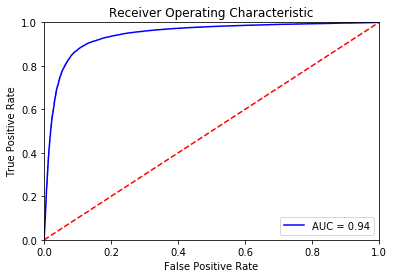

The log loss for the Naive bayes is: 0.419805696279


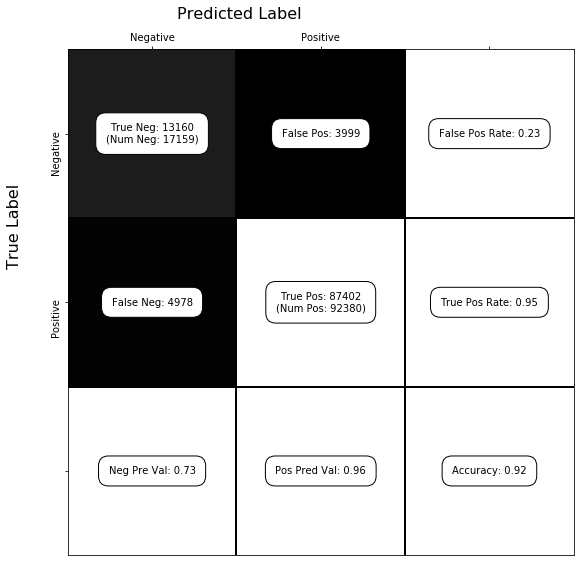

Precision : 95.624774346
Recall : 94.6113877463


In [184]:
from sklearn.metrics import confusion_matrix
score_Log_reg = []

vec = CountVectorizer(max_features = 70000)
data = vec.fit_transform(dataset)

clf = MultinomialNB()
x_train, x_test, y_train, y_test = train_test_split(data, scores, test_size=0.3, random_state=42)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
conf_NB = confusion_matrix(y_test, y_pred)    

print "Confusion matrix:\n",conf_NB

#ROC for a given alpha for NB
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area for each class
probs = clf.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

#Plot ROC
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#print the log loss
a = log_loss(y_test, probs)
print "The log loss for the Naive bayes is:",a

#print confusion matrix
show_confusion_matrix(conf_NB,['Negative','Positive'])

#Precision and recall
tn = conf_NB[0,0]; fp = conf_NB[0,1]; fn = conf_NB[1,0]; tp = conf_NB[1,1];

precision = 100*float(tp)/(tp+fp)
recall = 100*float(tp)/(tp+fn)

print "Precision :",precision
print "Recall :",recall


In [195]:
#Logistic regression
best_params_logreg = []
parameters = {'loss' :['log'],'penalty':['l1','l2','elasticnet'],'alpha':[float(i)/10 for i in range(1,10,1)],'n_jobs':[-1]}
 
clf = SGDClassifier()
clf = GridSearchCV(clf, parameters,cv=5)
clf.fit(x_train, y_train)
best_params_logreg.append(clf.best_params_)
print best_params_logreg

[{'penalty': 'l2', 'alpha': 0.1, 'n_jobs': -1, 'loss': 'log'}]


## For logistic regression hyperparameters penalty : 'l2', alpha:'0.1' gives the best results

Confusion matrix:
[[  297 16862]
 [   24 92356]]


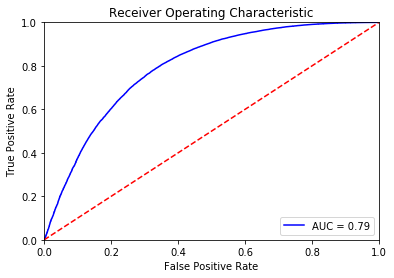

The log loss for the Logistic regression is: 0.405844580087


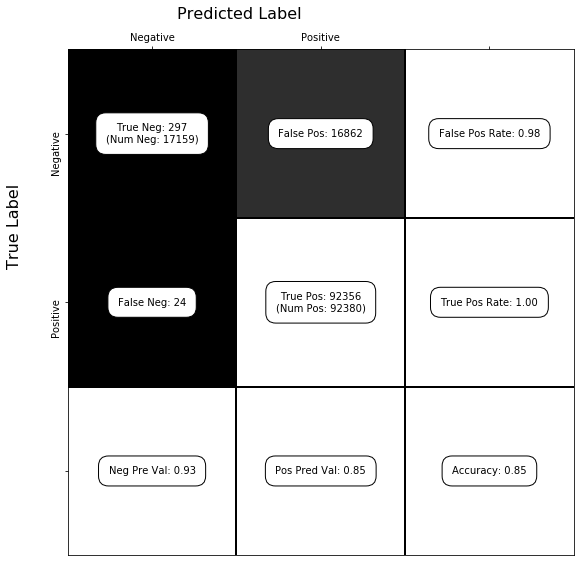

Precision : 84.5611529235
Recall : 99.9740203507


In [198]:
clf = SGDClassifier(loss = 'log',penalty = 'l2',alpha = 0.1, n_jobs = -1)
#choose acc to best parameters
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
conf_log_ref = confusion_matrix(y_test, y_pred)

print "Confusion matrix:\n",conf_log_ref
#ROC for a given hyperparameters for logistic regression
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area for each class
probs = clf.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

#Plot ROC
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#print the log loss
a = log_loss(y_test, probs)
print "The log loss for the Logistic regression is:",a

#print confusion matrix
show_confusion_matrix(conf_log_ref,['Negative','Positive'])

#Precision and recall
tn = conf_log_ref[0,0]; fp = conf_log_ref[0,1]; fn = conf_log_ref[1,0]; tp = conf_log_ref[1,1];

precision = 100*float(tp)/(tp+fp)
recall = 100*float(tp)/(tp+fn)

print "Precision :",precision
print "Recall :",recall


In [204]:
clf = SGDClassifier(loss = 'log',penalty = 'l2',alpha = 0.1, n_jobs = -1)
#choose acc to best parameters
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

print "Length of the weigth vector for logistic regression:",len(clf.coef_[0])

Length of the weigth vector for logistic regression 70000


In [223]:
W_vec = clf.coef_[0]
W_vec = abs(W_vec)
indices = list(range(len(W_vec)))
indices.sort(key=lambda x: W_vec[x])
vocab = vec.get_feature_names()

output = [0] * len(indices)
for counter, value in enumerate(indices):
    output[value] = counter

new_W_vec = []
for i in output:
    new_W_vec.append(vocab[i])
#Use clf.coef_ to find best 100 features, apply l1 regularization too

In [233]:
print "100 most common word features:\n\n",new_W_vec[-100:]

100 most common word features:

[u'delfa', u'fowl', u'delft', u'environmentally', u'fruitalicious', u'delhi', u'deli', u'delia', u'deliberate', u'failing', u'frustose', u'squiggles', u'underwhelming', u'gooseberry', u'hulled', u'smooched', u'hulless', u'deliberated', u'deliberately', u'lactose', u'milkshakes', u'kufta', u'deliberation', u'delic', u'mambo', u'delicaci', u'penthouse', u'meguez', u'nobs', u'delicacies', u'referencing', u'inglehoffer', u'hahaha', u'supplie', u'delicacy', u'shizzzznittt', u'delicate', u'metered', u'delicately', u'misled', u'delicateness', u'lauded', u'menacingly', u'delicatessen', u'delicatessens', u'mykonos', u'delicato', u'higgens', u'wesley', u'ultimately', u'nuturo', u'delice', u'deliceous', u'polycystic', u'mylanta', u'delices', u'delich', u'delici', u'delicicious', u'fruitarian', u'jip', u'stroganoff', u'jalepenos', u'delicieux', u'deliciious', u'delicioius', u'delicioous', u'mooch', u'delicios', u'lactulose', u'deliciosa', u'fini', u'delicioso', u'ja

In [207]:
#SVM
best_params_SVM = []
parameters = {'loss' :['hinge'],'penalty':['l1','l2','elasticnet'],'alpha':[float(i)/10 for i in range(1,10,1)],'n_jobs':[-1]}
 
clf = SGDClassifier()
clf = GridSearchCV(clf, parameters,cv=5)
clf.fit(x_train, y_train)
best_params_SVM = clf.best_params_
print "Best hyperparameters for linear SVM:",best_params_SVM

Best hyperparameters for linear SVM: {'penalty': 'l2', 'alpha': 0.1, 'n_jobs': -1, 'loss': 'hinge'}


## For linear SVM hyperparameters penalty : 'l2', alpha:'0.1' gives the best results

Confusion matrix:
[[  485 16674]
 [   22 92358]]


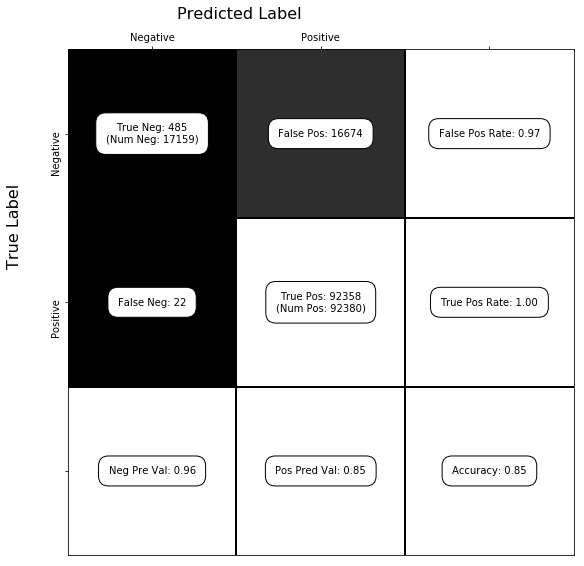

Precision : 84.7072419106
Recall : 99.9761853215


In [216]:
#Linear SVM
from sklearn import svm
clf = SGDClassifier(penalty = 'l2', alpha = 0.1, n_jobs =  -1, loss = 'hinge')

#choose acc to best parameters
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
conf_SVM_ref = confusion_matrix(y_test, y_pred)

print "Confusion matrix:\n",conf_SVM_ref

#print confusion matrix
show_confusion_matrix(conf_SVM_ref,['Negative','Positive'])

#Precision and recall
tn = conf_SVM_ref[0,0]; fp = conf_SVM_ref[0,1]; fn = conf_SVM_ref[1,0]; tp = conf_SVM_ref[1,1];

precision = 100*float(tp)/(tp+fp)
recall = 100*float(tp)/(tp+fn)

print "Precision :",precision
print "Recall :",recall